In [198]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Generate Dataset

In [199]:
x1 = np.random.uniform(low=-1.0, high=1.0, size=100)

print(x1.shape)
x1[0:10]

(100,)


array([ 0.11141276, -0.84881322, -0.74593659,  0.49634222,  0.7114461 ,
        0.9188447 ,  0.09959449, -0.59228932, -0.83611758,  0.18536924])

In [200]:
x2 = np.random.uniform(low=-1.0, high=1.0, size=100)

print(x2.shape)
x2[0:10]

(100,)


array([-0.96988131, -0.18615224,  0.51085739,  0.18806722, -0.20963296,
        0.27476974, -0.74715324,  0.50225816,  0.52310865, -0.09525756])

In [201]:
# True == 1, False == 0

y = x1 * 0.3 + x2 * 0.5 + 0.1 + (np.random.uniform(low=-1.0, high=1.0) * 0.05)
y = y >= 0.0

print(y.shape)
y[0:10]

(100,)


array([False, False,  True,  True,  True,  True, False,  True,  True,  True], dtype=bool)

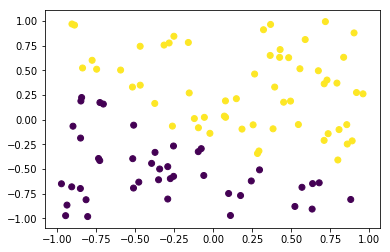

In [202]:
plt.scatter(x1, x2, c=y)

## Gradient Descent

In [203]:
def sigmoid(n):
    return 1 / (1 + np.exp(-n))

print(sigmoid(-9))
print(sigmoid(0))
print(sigmoid(+9))

0.000123394575986
0.5
0.999876605424


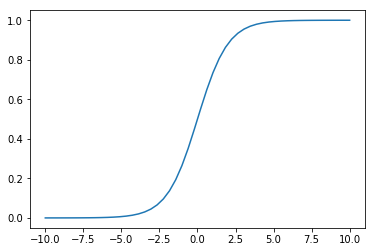

In [204]:
xx = np.linspace(start=-10.0, stop=+10.0)
yy = sigmoid(xx)

plt.plot(xx, yy)

In [205]:
num_epoch = 100

w1 = np.random.uniform(low=0.0, high=1.0)
w2 = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    y_predict = x1 * w1 + x2 * w2 + b
    y_predict = sigmoid(y_predict)
    
    predict = (y_predict >= 0.5)
    actual = y
    
    error = (predict != actual).mean()
    if error < 0.01:
        break
        
    if epoch % 10 == 0:
        print("{0} error = {1:.5f}".format(epoch, error))
    
    w1 = w1 - ((y_predict - y) * x1).mean()
    w2 = w2 - ((y_predict - y) * x2).mean()
    b = b - ((y_predict - y)).mean()
    
print("----" * 10)
print("{0} error = {1:.5f}".format(epoch, error))

0 error = 0.05000
10 error = 0.03000
20 error = 0.01000
----------------------------------------
24 error = 0.00000


In [206]:
import pandas as pd

y_predict = x1 * w1 + x2 * w2 + b
y_predict = sigmoid(y_predict)

predict = (y_predict >= 0.5)

pd.DataFrame({'x1': x1, 'x2': x2, 'y(actual)': y, 'y(predict)': predict})

,x1,x2,y(actual),y(predict)
0,0.111413,-0.969881,False,False
1,-0.848813,-0.186152,False,False
2,-0.745937,0.510857,True,True
3,0.496342,0.188067,True,True
4,0.711446,-0.209633,True,True
5,0.918845,0.274770,True,True
6,0.099594,-0.747153,False,False
7,-0.592289,0.502258,True,True
8,-0.836118,0.523109,True,True
9,0.185369,-0.095258,True,True


#### Decision Boundary

In [207]:
xx = np.linspace(start=-1.0, stop=1.0)
yy = -1.0 * (w1 * xx + b) / w2

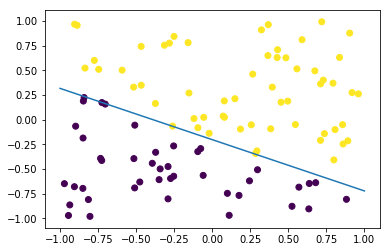

In [208]:
plt.plot(xx, yy)
plt.scatter(x1, x2, c=y)

## Multi-class Classification

In [209]:
from sklearn.datasets import load_iris
iris = load_iris()

In [210]:
X = iris["data"]
print(X.shape)
X[0:10]

(150, 4)


array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1]])

In [211]:
y = iris["target"]
print(y.shape)
y[0:10]

(150,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [212]:
data = pd.DataFrame(X, columns=iris['feature_names'])
data["y"] = y

print(data.shape)
data.head()

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


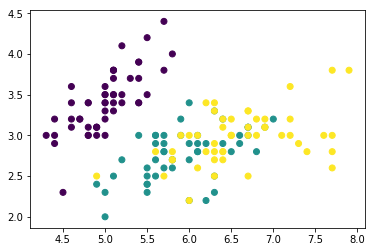

In [213]:
plt.scatter(data['sepal length (cm)'], data["sepal width (cm)"], c=y)

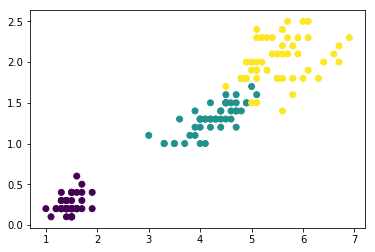

In [214]:
plt.scatter(data['petal length (cm)'], data["petal width (cm)"], c=y)

In [215]:
y_hot = np.eye(3)[y]
# from keras.utils import to_categorical

# y_hot = to_categorical(y)

print(y_hot.shape)
y_hot[0:5]

(150, 3)


array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.]])

## Gradient Descent

In [216]:
num_epoch = 1000
learning_rate = 0.029

w = np.random.uniform(low=0.0, high=1.0, size=(4, 3))
b = np.random.uniform(low=0.0, high=1.0, size=3)

for epoch in range(num_epoch):
    y_predict_hot = X.dot(w) + b
    y_predict_hot = sigmoid(y_predict_hot)
    
    y_predict = y_predict_hot.argmax(axis=1)
    
    error = (y != y_predict).mean()
    
    if error < 0.1:
        break
    
    if epoch % 10 == 0:
        print("{0:2} error = {1:.5f}".format(epoch, error))
    
    w = w - learning_rate * X.T.dot(y_predict_hot - y_hot)
    b = b - learning_rate * (y_predict_hot - y_hot).mean(axis=0)
    
print("-----" * 10)
print("{0:2} error = {1:.5f}".format(epoch, error))

 0 error = 0.66667
10 error = 0.66667
20 error = 0.56667
30 error = 0.34000
40 error = 0.33333
50 error = 0.26000
60 error = 0.28000
70 error = 0.33333
80 error = 0.42000
90 error = 0.33333
100 error = 0.41333
110 error = 0.38667
120 error = 0.34000
--------------------------------------------------
124 error = 0.06667


In [105]:
y_predict_hot = X.dot(w) + b
y_predict_hot = sigmoid(y_predict_hot)
y_predict = y_predict_hot.argmax(axis=1)

result = data.copy()
result["y(predict)"] = y_predict

print(result.shape)
result.head()

(150, 6)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y,y(predict)
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [93]:
from keras.datasets import mnist

((X_train, y_train), (X_test, y_test)) = mnist.load_data()

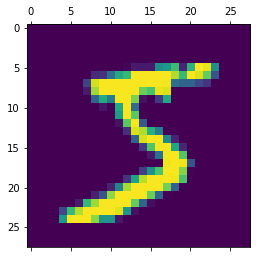

In [94]:
plt.matshow(X_train[0])

In [275]:
X_train_reshape = X_train.reshape(60000, 28 * 28)

In [239]:
y_train_hot = np.eye(10)[y_train]
# from keras.utils import to_categorical

# y_hot = to_categorical(y)

print(y_train_hot.shape)
y_train_hot[0:5]

(60000, 10)


array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [289]:
w = np.random.uniform(low=0.0, high=0.0001, size=(784, 10))
b = np.random.uniform(low=0.0, high=0.0001, size=10)

In [ ]:
num_epoch = 1000
learning_rate = 0.0000001

for epoch in range(num_epoch):
    y_predict_hot = X_train_reshape.dot(w) + b
    y_predict_hot = sigmoid(y_predict_hot)
    
    y_predict = y_predict_hot.argmax(axis=1)
    
    error = (y_train != y_predict).mean()
    
    if error < 0.095:
        break
    
    if epoch % 10 == 0:
        print("{0:2} error = {1:.5f}".format(epoch, error))
    
    w = w - learning_rate * X_train_reshape.T.dot(y_predict_hot - y_train_hot)
    b = b - learning_rate * (y_predict_hot - y_train_hot).mean(axis=0)
    
print("-----" * 10)
print("{0:2} error = {1:.5f}".format(epoch, error))

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


 0 error = 0.09993
10 error = 0.27072
20 error = 0.15503
30 error = 0.12523
40 error = 0.10653
50 error = 0.14145
60 error = 0.20963
70 error = 0.09770
80 error = 0.12845
90 error = 0.25222
100 error = 0.15932
110 error = 0.11700
120 error = 0.10990
130 error = 0.21152
140 error = 0.21573
150 error = 0.14812
160 error = 0.17728
170 error = 0.11485
180 error = 0.12437
190 error = 0.11753
200 error = 0.15105
210 error = 0.18500
220 error = 0.18682
230 error = 0.17552
240 error = 0.12522
250 error = 0.12815
260 error = 0.11310
270 error = 0.15547
280 error = 0.20755
290 error = 0.24907
300 error = 0.11995
310 error = 0.13095
320 error = 0.17110
330 error = 0.11142
340 error = 0.11243
350 error = 0.11462
360 error = 0.17083
370 error = 0.15662
380 error = 0.12763
390 error = 0.10307
400 error = 0.16770
410 error = 0.26768
420 error = 0.12810
430 error = 0.22763
440 error = 0.10472
450 error = 0.16683
460 error = 0.16928
470 error = 0.11118
480 error = 0.16572
490 error = 0.16772
500 error 

In [284]:
train_data = pd.DataFrame({"y_train":y_train})
print(train_data.shape)
train_data.head()

(60000, 1)


,y_train
0,5
1,0
2,4
3,1
4,9


In [285]:
y_predict_hot = X_train_reshape.dot(w) + b
y_predict_hot = sigmoid(y_predict_hot)
y_predict = y_predict_hot.argmax(axis=1)

train_result = train_data.copy()
train_result["y(predict)"] = y_predict
train_result["equal"] = (train_data["y_train"] == y_predict)

print(train_result.shape)
train_result[train_result["equal"] == True].count()

(60000, 3)


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


y_train       54041
y(predict)    54041
equal         54041
dtype: int64

In [286]:
X_test_reshape = X_test.reshape(10000, 28 * 28)

In [287]:
test_data = pd.DataFrame({"y_test":y_test})
print(test_data.shape)
test_data.head()

(10000, 1)


,y_test
0,7
1,2
2,1
3,0
4,4


In [288]:
y_predict_hot = X_test_reshape.dot(w) + b
y_predict_hot = sigmoid(y_predict_hot)
y_predict = y_predict_hot.argmax(axis=1)

result = test_data.copy()
result["y(predict)"] = y_predict
result["equal"] = (data["y_test"] == y_predict)

print(result.shape)
result[result["equal"] == True].count()

(10000, 3)


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


y_test        8987
y(predict)    8987
equal         8987
dtype: int64